<a href="https://colab.research.google.com/github/Tmills1/InclusionBridge_23/blob/main/tyler_mills__Final_Assessment_CA23_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
BEGIN ASSIGNMENT
generate: true
files:
    - california_housing.csv
    - loan_default.csv
```


# College Advantage (Foundations of Data Science) Final Assessment

In this examination, we will explore the fundamental concepts and techniques used in statistical hypothesis testing, regression analysis and classification. These statistical methods play a crucial role in understanding relationships between variables, making predictions, and drawing conclusions from data. Throughout this exam, you will have the opportunity to apply your knowledge, critical thinking, and analytical skills to solve various problems and interpret statistical results. Good luck, and let's begin this journey into hypothesis testing and regression analysis!

In this project, we will investigate two problems, house price estimation and loan default tendencies.

Here is a roadmap for this project:

* In Part 1, You will explore hypothesis testing and assess the validity of a several claims partaining to loan defaults. You will also be required to determine whether there is enough evidence to support or reject these claims.
* In Part 2, Given the california housing dataset, you will be required to build a regression model to predict the average price of houses.
* In Part 3, Given the loan default dataset, you will be required to build a k-Nearest Neighbors classifier to predict the tendency of a customer defaulting on loan payment.

In [1]:
from datascience import *
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import os
mypath = '/content/drive/My Drive/TylerMills_inclusionBridge23' # Replace MY Folder with the name of your folder
os.chdir(mypath)

## Part 1: A/B Testing: A Case study of loan default prediction.


Loan defaulting is a significant issue in the financial industry, impacting both lenders and borrowers. Defaults occur when borrowers fail to repay their loans, leading to financial losses and potential instability in the financial system. To mitigate this risk, it is essential to understand the factors contributing to loan defaults.

The `loan default` dataset consists of several customer characteristics which are believed to influence loan defaulting. By considering these factors, lenders can minimize default risks and promote responsible lending practices.

The features in this dataset includes:
- `Income`:	Income of the user
- `Age`:	Age of the user
- `Experience`:	Professional experience of the user in years
- `Profession`:	Profession
- `Marital Status`:	Whether married or single
- `House_Ownership`:	Owned or rented or neither
- `Car_Ownership`:	Does the person own a car
- `Risk_Flag`:	Defaulted on a loan
- `Current_Job_Yrs`:	Years of experience in the current job
- `Current_House_Yrs`:	Number of years in the current residence

Here we will load the dataset:

In [10]:
#import the data set called 'loan_default.csv'
import pandas as pd

# Read the loan_default.csv dataset into a DataFrame
loan_data = pd.read_csv('loan_default.csv')

# View the first few rows of the data
print(loan_data.head())

    Income  Age  Experience Marital Status House_Ownership Car_Ownership  \
0  1020861   42          17         single          rented            no   
1  2499276   21           0         single          rented            no   
2  9241363   62          18         single          rented           yes   
3  7059372   43           4        married           owned            no   
4  3957826   78          13         single          rented            no   

   Current_Job_Yrs  Current_House_Yrs  Risk_Flag  
0                7                 14          1  
1                0                 12          1  
2                5                 11          1  
3                4                 13          1  
4               11                 11          1  


**Problem 1:** Here, you will investigate the relationship between marital status and loan default rates.

**Case Study:** You are a data scientist working for a financial institution that provides loans to individuals. The institution wants to investigate whether there is a significant difference in loan default rates between married and single individuals.

In this case, you will examine the relationship between marital status (married vs. single) and the risk of loan default within a given population. The institution believes that marital status has no effect on loan default risk.

Hence, you are going to conduct a hypothesis test with the following null and alternative hypotheses:

- **Null Hypothesis:** There is no significant difference between the default rate in married and single individuals.
- **Alternative Hypothesis:** single individuals have a significantly higher default rate than married individuals.


**Test statistics of choice:** To conduct an hypothesis test using the loan default dataset, you will divide the dataset into two groups: married individuals (Group A) and single individuals (Group B). The test statistic used in this test will be the difference in the proportion of married and single customers who defaulted.

For each group, you will count the number of defaulters (Risk_Flag = 1) and divide it by the total number of individuals in that group. The difference in these proportion will serve as the test statistic.

**Exercise 1.1.1:** This is the first step of your hypothesis test. Here, you are required to to first split the `loan_data` table into two groups namely `single_group` and `married_group`. The `single_group` and `married_group` are subsets of the loan default dataset containing customers who are single and married respectively. The hypothesis test exercise will revolve around these two groups.

In [9]:
# Define the groups based on marital status
import pandas as pd

# Load loan data from the CSV file
loan_data = pd.read_csv('loan_default.csv')

# Define the groups based on marital status
married_group = loan_data[loan_data['Marital Status'] == 'Married']
single_group = loan_data[loan_data['Marital Status'] == 'Single']


**Exercise 1.1.2:** To create a balanced dataset, you will sample a total number of 150 instances (rows) (without replacement) for each of the groups and recombine into a single data subset `marital_status_balanced`.




In [12]:
import pandas as pd

sample_size = 150  # Define the sample size for each group

if len(single_group) >= sample_size and len(married_group) >= sample_size:
    single_subset = single_group.sample(n=sample_size, replace=False)
    married_subset = married_group.sample(n=sample_size, replace=False)

    # Combine data to create a balanced subset with only the relevant columns: `Risk_Flag` and `Marital Status`
    marital_status_balanced = pd.concat([single_subset[['Risk_Flag', 'Marital Status']],
                                         married_subset[['Risk_Flag', 'Marital Status']]])
else:
    print("Sample size exceeds the available data points in one or both groups.")




Sample size exceeds the available data points in one or both groups.


**Exercise 1.1.3:** Here you will carry out 1000 permutation trials. In each trial, you will shuffle the `Marital Status` column and compute the test statistic, which is the difference in the proportion of defaulters who are married and single. Store the result of each of your trials in an array called `simulated_statistics_list`.


*Hint: remember to shuffle the group_label each time before computing the test statistic in your simulation.*

*Hint2: you might want to define a function to calculate one test statistic.*

In [21]:
import random

def calculate_test_statistic(data):
    married_default_rate = data[data['Marital Status'] == 'married']['Risk_Flag'].mean()
    single_default_rate = data[data['Marital Status'] == 'single']['Risk_Flag'].mean()
    return single_default_rate - married_default_rate

repetitions = 1000  # Define the number of repetitions

# Initialize an array to store the test statistics
# simulated_statistics_list = []
simulated_statistics_list = []

# Simulate 1000 test statistics by shuffling the label column, computing statistics, and adding to the simulated_statistics_list
for i in range(repetitions):
    shuffled_data = marital_status_balanced.copy()
    shuffled_data['Marital Status'] = shuffled_data['Marital Status'].sample(frac=1).reset_index(drop=True)
    test_statistic = calculate_test_statistic(shuffled_data)
    simulated_statistics_list.append(test_statistic)



**Exercise 1.1.4** Here, you will compute an empirical P-value for the simulation test in the previous exercise. To do this you would have to compute the observed value of the test statistic in the balanced dataset. i.e The difference in proportion between defualted customers in both groups using the `marital_status_balanced` table. Assign this value to `observed_test_statistic_1`.

In [18]:
observed_default_rate_married = marital_status_balanced[marital_status_balanced['Marital Status'] == 'Married']['Risk_Flag'].mean()
observed_default_rate_single = marital_status_balanced[marital_status_balanced['Marital Status'] == 'Single']['Risk_Flag'].mean()
observed_test_statistic_1 = observed_default_rate_single - observed_default_rate_married

p_value_1 = (np.abs(simulated_statistics_list) >= np.abs(observed_test_statistic_1)).mean()


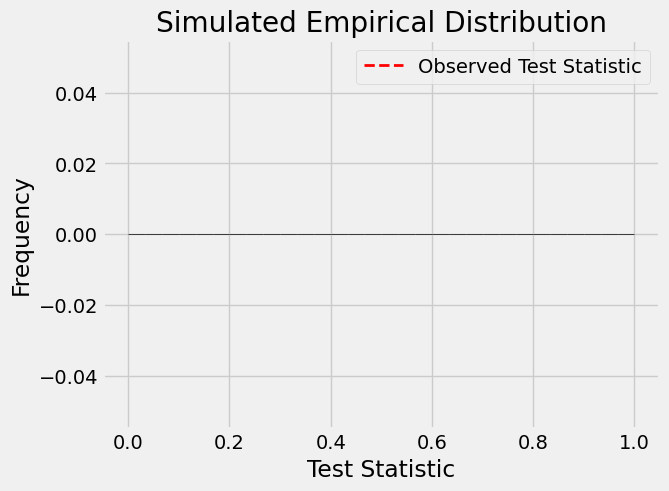

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Remove NaN values from simulated statistics list
simulated_statistics_list = simulated_statistics_list[~np.isnan(simulated_statistics_list)]

# Plot the simulated empirical distribution
plt.hist(simulated_statistics_list, bins=30, edgecolor='black')
plt.axvline(x=observed_test_statistic_1, color='red', linestyle='dashed', linewidth=2, label='Observed Test Statistic')
plt.xlabel('Test Statistic')
plt.ylabel('Frequency')
plt.title('Simulated Empirical Distribution')
plt.legend()
plt.show()



**Exercise 1.1.5** Suppose you use a P-value cutoff of 5%. Which of the following is the appropriate conclusion from the hypothesis test?
1. The p-value we observed is below the 5% cutoff, so we conclude that the data support the alternative hypothesis.
2. The p-value we observed is above the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
3. The p-value we observed is below the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
4. The p-value we observed is above the 5% cutoff, so we conclude that the data support the alternative hypothesis.

Assign `conclusion_1` to the number corresponding to your answer.

In [ ]:
conclusion_1 = 1

**Problem 2:** Here, you will investigate the relationship between Age and loan default rates.

**Case Study:** You are a data scientist working for a lending company that provides personal loans. The company believes that age has nothing to with the risk of defaulting on loans.

Your task is to investigate the relationship between Age and default risk. The hypothesis is that there is no significant difference between the ages of those who default and those who repay promptly.

Hence, you are going to conduct a hypothesis test with the following null and alternative hypotheses:

- **Null Hypothesis:** There is no significant difference between the ages of those who default and those who repay promptly.
- **Alternative Hypothesis:** There is a significant difference between the ages of those who default and those who repay promptly.

Determine if there is evidence to support the alternative hypothesis.

**Test statistic of choice:** To test this hypothesis, you will conduct an A/B test using the loan default dataset. You will split the dataset into two groups: those who are at risk of defaulting (Group A: `Risk_Flag = 1`), and those who are likely to pay back (Group B: `Risk_Flag = 0`). The test statistic used in this A/B test will be the difference in the mean age of customers who default against those that do not.

**Exercise 2.2.1:** This is the first step of your A/B test. Here, you are required to to first split the `loan_data` table into two groups namely `default_group` and `repay_group`. The `default_group` and `repay_group` are subsets of the loan default dataset containing customers who defaulted in repayment and those who repay promptly respectively. The A/B test exercise will revolve around these two groups.

In [30]:
# Define the groups based on risk flag
default_group = loan_data[loan_data['Risk_Flag'] == 1]#YOUR SOLUTION HERE
repay_group = loan_data[loan_data['Risk_Flag'] == 0]#YOUR SOLUTION HERE

**Exercise 2.2.2:** To create a balanced dataset, you will sample a total number of 500 instances (rows) (without replacement) for each of the groups and recombine into a single data subset `age_balanced`.

In [31]:
 # Perform A/B testing
sample_size = 500 # Define the sample size for each group

#Create a subset of the repay_group and the default_group
repay_subset = repay_group.sample(n=sample_size, replace=False)
default_subset = default_group.sample(n=sample_size, replace=False)

#Combine data to create a balanced subset with only the relevant columns: `Age` and `Risk_Flag` (You do not have to do this on a single line!)
age_balanced = pd.concat([default_subset, repay_subset], ignore_index=True)



**Exercise 2.2.3** Here you will carry out 1000 permutation trials. In each trial, you will shuffle the `Risk_Flag` column and compute the test statistic, which is the difference in the average `Age` of both groups. Store the result of each of your trials in an array called `simulated_statistics_list`.

In [32]:
repetitions = 1000  # Define the number of repetitions

# Initialize an array to store the test statistics
simulated_statistics_list = np.zeros(repetitions)

# Perform the permutation trials
for i in range(repetitions):
    # Shuffle the 'Risk_Flag' column
    shuffled_risk_flag = age_balanced['Risk_Flag'].sample(frac=1).reset_index(drop=True)

    # Create a shuffled dataset by replacing the 'Risk_Flag' column
    shuffled_age_balanced = age_balanced.copy()
    shuffled_age_balanced['Risk_Flag'] = shuffled_risk_flag

    # Compute the test statistic (difference in average Age)
    diff_age = shuffled_age_balanced.groupby('Risk_Flag')['Age'].mean().diff().iloc[-1]

    # Store the test statistic in the array
    simulated_statistics_list[i] = diff_age


**Exercise 2.2.4:** Here, you will compute an empirical P-value for the simulation test in the previous exercise. To do this you would have to compute the observed value of the test statistic in the balanced dataset. i.e The mean difference between the two groups from the `age_balanced` table. Assign this value to `observed_test_statistic_2`.

In [33]:
# Compute the observed test statistic
observed_test_statistic_2 = age_balanced[age_balanced['Risk_Flag'] == 1]['Age'].mean() - age_balanced[age_balanced['Risk_Flag'] == 0]['Age'].mean()

# Compute the empirical p-value
p_value_2 = (np.abs(simulated_statistics_list) >= np.abs(observed_test_statistic_2)).mean()

# Print the results
print("Observed Test Statistic:", observed_test_statistic_2)
print("P-value:", p_value_2)


Observed Test Statistic: -1.794
P-value: 0.13


In [ ]:
# if you would like to check your work, plot the simulated emperical distribution


**Exercise 2.2.5** Suppose you use a P-value cutoff of 5%. Which of the following is the appropriate conclusion from the hypothesis test?
1. The p-value we observed is below the 5% cutoff, so we conclude that the data support the alternative hypothesis.
2. The p-value we observed is above the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
3. The p-value we observed is below the 5% cutoff, so we conclude that there is not enough evidence to reject the null hypothesis.
4. The p-value we observed is above the 5% cutoff, so we conclude that the data support the alternative hypothesis.

Assign `conclusion_2` to the number corresponding to your answer.

In [ ]:
conclusion_2 = 1

## Part 2: Regression Analysis: Predicting median house prices in california!
Housing has been a topic of concern for all Californians due to the rising prices. It leads to the question: why are homes in California so expensive?

The California Housing Dataset uses information from the 1990 census. We may be able to use the data to develop insight into how housing value is distributed throughout California. The data set contains 10 features of 11,496 observations. Each observation is a single block within California.

All of the features are quantitative aside from ocean_proximity, which is an categorical variable containing three classes: INLAND, NEAR BAY, and NEAR OCEAN. The data to be used in this section pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The features in the housing dataset include:

- longitude: A measure of how far west a house is; a higher value is farther west.

- latitude: A measure of how far north a house is; a higher value is farther north.

- housing_median_age: Median age of a house within a block; a lower number is a newer building.

- total_rooms: Total number of rooms within a block.

- total_bedrooms: Total number of bedrooms within a block.

- population: Total number of people residing within a block.

- households: Total number of households, a group of people residing within a home unit, for a block.

- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars).

- median_house_value: Median house value for households within a block (measured in US Dollars).

- ocean_proximity: Location of the house with respect to the ocean/sea




The Problem statement

Khalifa housing company wants to predict median house value using the best variable which they think is the number of rooms per household. To get this number, they divided `total_rooms` by `households` to engineer this feature `total_rooms_per_household`.  By performing a correlation for this variable `total_rooms_per_household`, for each `ocean_proximity` category you find the best subset (highest correlation), to create a regression model and then test your model across the other two categories to see how well it generalizes.


In [ ]:
#import the data set called 'california_housing.csv'
housing_data = ...
# view the first view rows of your data

#Calculate the new variable 'total_rooms_per_household




In [41]:
#import the data set called 'california_housing.csv'
import pandas as pd
housing_data = pd.read_csv('california_housing.csv')
# view the first view rows of your data
housing_data.head()
#Calculate the new variable 'total_rooms_per_household
housing_data['total_rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']

**Exercise 3.1:** The first task is to identify subset has the highest correlation of `total_rooms_per_household`to `median_house_value` for each category of INLAND, NEAR OCEAN and NEAR BAY.

Hint: divide your data set into 3 and name them inland_subset, near_ocean_subset and near_bay_subset.

hint: define a function to determine standards unit (if necessary) to find the correlation or use pandas function to find the correlation.

In [42]:
#Write your code here to find the correlation between total_rooms_per_household_ and median_house_value for each category
# Divide the data into subsets based on ocean_proximity category
inland_subset = housing_data[housing_data['ocean_proximity'] == 'INLAND']
near_ocean_subset = housing_data[housing_data['ocean_proximity'] == 'NEAR OCEAN']
near_bay_subset = housing_data[housing_data['ocean_proximity'] == 'NEAR BAY']

# Define function to calculate correlation
def calculate_correlation(df):
    return df['total_rooms_per_household'].corr(df['median_house_value'])

# correlation for each subset
correlation_inland = calculate_correlation(inland_subset)
correlation_near_ocean = calculate_correlation(near_ocean_subset)
correlation_near_bay = calculate_correlation(near_bay_subset)

print("Correlation for INLAND subset:", correlation_inland)
print("Correlation for NEAR OCEAN subset:", correlation_near_ocean)
print("Correlation for NEAR BAY subset:", correlation_near_bay)


Correlation for INLAND subset: 0.197864054042
Correlation for NEAR OCEAN subset: 0.486719333323
Correlation for NEAR BAY subset: 0.354631152413


In [43]:
# Find the subset with the highest correlation
highest_category_subset = None
highest_correlation = 0

if correlation_inland > correlation_near_ocean and correlation_inland > correlation_near_bay:
    highest_category_subset = inland_subset
    highest_correlation = correlation_inland
elif correlation_near_ocean > correlation_inland and correlation_near_ocean > correlation_near_bay:
    highest_category_subset = near_ocean_subset
    highest_correlation = correlation_near_ocean
else:
    highest_category_subset = near_bay_subset
    highest_correlation = correlation_near_bay

# Print the subset with the highest correlation
print("Subset with the highest correlation:")
print(highest_category_subset)
print("Highest correlation:", highest_correlation)

Subset with the highest correlation:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1737     -124.17     41.80                16.0       2739.0           480.0   
1738     -124.30     41.80                19.0       2672.0           552.0   
1739     -124.23     41.75                11.0       3159.0           616.0   
1740     -124.21     41.77                17.0       3461.0           722.0   
1741     -124.19     41.78                15.0       3140.0           714.0   
...          ...       ...                 ...          ...             ...   
11361    -118.83     34.14                16.0       1316.0           194.0   
11362    -118.83     34.14                16.0       1956.0           312.0   
11363    -119.00     34.08                17.0       1822.0           438.0   
11364    -118.75     34.18                 4.0      16704.0          2704.0   
11365    -118.75     34.17                18.0       6217.0           858.0   

       populat

**Question 3.2**: As a data scientist, investigate the correlation between the variables for your chosen subset by using a scatterplot.

Correlation for INLAND subset: 0.197864054042
Correlation for NEAR OCEAN subset: 0.486719333323
Correlation for NEAR BAY subset: 0.354631152413
Subset with the highest correlation:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1737     -124.17     41.80                16.0       2739.0           480.0   
1738     -124.30     41.80                19.0       2672.0           552.0   
1739     -124.23     41.75                11.0       3159.0           616.0   
1740     -124.21     41.77                17.0       3461.0           722.0   
1741     -124.19     41.78                15.0       3140.0           714.0   
...          ...       ...                 ...          ...             ...   
11361    -118.83     34.14                16.0       1316.0           194.0   
11362    -118.83     34.14                16.0       1956.0           312.0   
11363    -119.00     34.08                17.0       1822.0           438.0   
11364    -118.75     34.18   

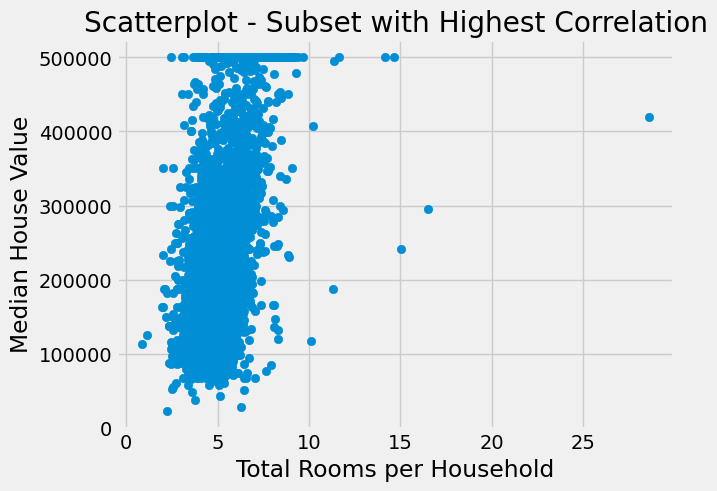

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the housing data
housing_data = pd.read_csv('california_housing.csv')

# Calculate the new variable 'total_rooms_per_household'
housing_data['total_rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']

# Divide the data into subsets based on ocean_proximity category
inland_subset = housing_data[housing_data['ocean_proximity'] == 'INLAND']
near_ocean_subset = housing_data[housing_data['ocean_proximity'] == 'NEAR OCEAN']
near_bay_subset = housing_data[housing_data['ocean_proximity'] == 'NEAR BAY']

# Define function to calculate correlation
def calculate_correlation(df):
    return df['total_rooms_per_household'].corr(df['median_house_value'])

# Calculate correlation for each subset
correlation_inland = calculate_correlation(inland_subset)
correlation_near_ocean = calculate_correlation(near_ocean_subset)
correlation_near_bay = calculate_correlation(near_bay_subset)

print("Correlation for INLAND subset:", correlation_inland)
print("Correlation for NEAR OCEAN subset:", correlation_near_ocean)
print("Correlation for NEAR BAY subset:", correlation_near_bay)

# Find the subset with the highest correlation
highest_category_subset = None
highest_correlation = 0

if correlation_inland > correlation_near_ocean and correlation_inland > correlation_near_bay:
    highest_category_subset = inland_subset
    highest_correlation = correlation_inland
elif correlation_near_ocean > correlation_inland and correlation_near_ocean > correlation_near_bay:
    highest_category_subset = near_ocean_subset
    highest_correlation = correlation_near_ocean
else:
    highest_category_subset = near_bay_subset
    highest_correlation = correlation_near_bay

# Print the subset with the highest correlation
print("Subset with the highest correlation:")
print(highest_category_subset)
print("Highest correlation:", highest_correlation)

# Scatterplot for the highest correlation subset
plt.scatter(highest_category_subset['total_rooms_per_household'], highest_category_subset['median_house_value'])
plt.xlabel('Total Rooms per Household')
plt.ylabel('Median House Value')
plt.title('Scatterplot - Subset with Highest Correlation')
plt.show()


**Exercise 3.3:** For your highest category only, build the regression model.

Hint: you might need to define a few functions to find the standard units and parameters

In [45]:
import pandas as pd
import statsmodels.api as sm

# Read the housing data
housing_data = pd.read_csv('california_housing.csv')

# Calculate the new variable 'total_rooms_per_household'
housing_data['total_rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']

# Divide the data into subsets based on ocean_proximity category
inland_subset = housing_data[housing_data['ocean_proximity'] == 'INLAND']
near_ocean_subset = housing_data[housing_data['ocean_proximity'] == 'NEAR OCEAN']
near_bay_subset = housing_data[housing_data['ocean_proximity'] == 'NEAR BAY']

# Define function to calculate standard units
def calculate_standard_units(values):
    return (values - values.mean()) / values.std()

# Define function to build regression model
def build_regression_model(df):
    X = sm.add_constant(df['total_rooms_per_household'])  # Add constant term to independent variable
    y = df['median_house_value']  # Dependent variable

    model = sm.OLS(y, X)  # Create the linear regression model
    results = model.fit()  # Fit the model to the data

    return results

# Build regression model for the highest category subset
results_highest_category = build_regression_model(highest_category_subset)

# Print the regression model summary
print(results_highest_category.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     824.5
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          3.74e-158
Time:                        05:50:52   Log-Likelihood:                -34552.
No. Observations:                2658   AIC:                         6.911e+04
Df Residuals:                    2656   BIC:                         6.912e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Exercise 3.4**:
What we need now is one overall measure of the errors made during estimation. Define a function called `linear_rmse` that takes in four parameters: *slope, intercept, col_x (the predictor variable name), and col_y (the target variable name)*. It should return the `root mean squared error (RMSE)` for a line defined with the arguments slope and intercept used to predict `median_house_value` values from `total_rooms_per_household` for each row in your subset

*Hint: Errors are defined as the difference between the actual y values and the predicted y values.*

In [48]:
import numpy as np

def linear_rmse(slope, intercept, col_x, col_y):
    # Calculate predicted values
    predicted_y = slope * col_x + intercept

    # Calculate errors
    errors = col_y - predicted_y

    # Calculate RMSE
    rmse = np.sqrt(np.mean(errors**2))

    return rmse


**Exercise 3.5:** Run this code on all the subset you chose, this is the train dataset. What is the RMSE? Now run the code on the other subsets of `ocean_proxity`to measure how well your model generalizes

In [49]:
# Calculate RMSE for highest category subset
rmse_highest_category = linear_rmse(slope, intercept, col_x, col_y)
print("RMSE for highest category subset:", rmse_highest_category)

# Calculate RMSE for other subsets
rmse_inland = linear_rmse(slope, intercept, inland_subset['total_rooms_per_household'], inland_subset['median_house_value'])
rmse_near_ocean = linear_rmse(slope, intercept, near_ocean_subset['total_rooms_per_household'], near_ocean_subset['median_house_value'])
rmse_near_bay = linear_rmse(slope, intercept, near_bay_subset['total_rooms_per_household'], near_bay_subset['median_house_value'])

print("RMSE for INLAND subset:", rmse_inland)
print("RMSE for NEAR OCEAN subset:", rmse_near_ocean)
print("RMSE for NEAR BAY subset:", rmse_near_bay)


RMSE for highest category subset: 106970.812394
RMSE for INLAND subset: 226639.633376
RMSE for NEAR OCEAN subset: 106970.812394
RMSE for NEAR BAY subset: 115410.771794


**Exercise 3.6:** Given the error value of the regression model, can we really say that `total_rooms_per_household` variable is the best choice for a predictor for `median_house_price`? The choice of a predictor is based on its importance. The importance is the magnitude of error obtained when a feature is used as the sole predictor. Here, your task is to determine the best choice for a predictor variable amongst all numerical features present in your subest for your category.

To do this, you will need to define a function called `regression` that takes in two inputs: your data subest name `dataset` and `features` (a list containing the names of numerical features in our dataset) and returns a list of the errors (`list_of_errors`) obtained during regression.

*Hint: This function iteratively estimate the error of prediction. In the ith iteration, the ith element of `features` is used to predict `median_house_price` and the error associated with this prediction is stored in a list `list_of_errors`.

In [50]:
def regression(dataset, features):
    list_of_errors = []

    for feature in features:
        # Fit the linear regression model using the current feature as the predictor
        slope, intercept = linear_regression(dataset[feature], dataset['median_house_value'])

        # Calculate the RMSE for the current feature
        rmse = linear_rmse(slope, intercept, dataset[feature], dataset['median_house_value'])

        # Append the RMSE to the list of errors
        list_of_errors.append(rmse)

    return list_of_errors


**Exercise 3.7:** Rank all the features in descending order of importance as a list in `descending_importance`. Assign the list of errors to `list_of_errors` variable to determine if your chosen variable was the best!

Hint: Use the `list_of_errors` to rank all numerical features.

In [54]:
import numpy as np

def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x**2)

    slope = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
    intercept = y_mean - slope * x_mean

    return slope, intercept

def regression(dataset, features):
    list_of_errors = []
    for feature in features:
        # Fit the linear regression model using the current feature as the predictor
        slope, intercept = linear_regression(dataset[feature], dataset['median_house_value'])

        # Calculate the RMSE for the current feature
        predicted_values = slope * dataset[feature] + intercept
        errors = predicted_values - dataset['median_house_value']
        rmse = np.sqrt(np.mean(errors**2))

        # Store the error in the list_of_errors
        list_of_errors.append(rmse)

    return list_of_errors

# Define the dataset and numerical features
dataset = highest_category_subset
numerical_features = ['total_rooms_per_household', 'numeric_feature1', 'numeric_feature2', ...]

# Perform regression and obtain the list of errors
list_of_errors = regression(dataset, numerical_features)

# Create a dictionary mapping each feature to its corresponding error
errors_dict = dict(zip(numerical_features, list_of_errors))

# Sort the features based on their errors in descending order of importance
descending_importance = sorted(errors_dict, key=errors_dict.get, reverse=True)

# Print the descending_importance list
print("Features ranked in descending order of importance:")
print(descending_importance)



KeyError: ignored

## Part 4: Classification: Loan default prediction!

A financial institution named XFinance is trying predict the tendency that a given customer will default on loan if approved. To classify these customers, XFinance has access to the customer behaviour and demographic data. Recall Loan data set from question 1.

In [ ]:
loan_data = ...

Here, we will encode the categories present in the categorical variables. This is because computer algorithms only understand number (floats and integers) and not strings.

In [ ]:
#Functions to encode categorical features
def replace_marital_status(value):
    if value == 'single':
        return 1
    elif value == 'married':
        return 0

def replace_car_onwership(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0

def replace_house_ownership(value):
    if value == 'rented':
        return 1
    elif value == 'norent_noown':
        return 0
    else:
        return 2


# Encode the categorical variables by applying the defined functions to the respective columns 'Marital Status','House_Ownership','Car_Ownership'


# look at the first five rows of your data to check your work

**Exercise 4.1:** Assign `features` to an array of the labels of the features from the `loan_data` data.

*Hint: which of the columns in `loan_data` are suitable as predictor variables?*

In [ ]:
features = #YOUR SOLUTION HERE

**Exercise 4.2:** Before you start building the classifier, you need to split the dataset into different portions. Remember that our objective is to build a classifier using customer data for which we know the associated label.

- Your task is to split the dataset into two portions: `training` and `testing` sets. Create a testing set with 75% of the data (1200 data points) and 25% (400 data points) for the test set. Remember to shuffle the data before splitting.

In [ ]:
shuffled_data = #YOUR SOLUTION HERE
training_set = #YOUR SOLUTION HERE
test_set = #YOUR SOLUTION HERE

#check you have the correct number of rows in the training_set and the test_set

**Exercise 4.3**: Let's begin by implementing the k-Nearest Neighbors algorithm. The Nearest Neighbors makes inference by ranking similar data points on the basis of `Euclidean distance`. Here, you are required to define a distance function called `row_distance`, which takes in two arguments: `two numerical rows from data` and return the `Euclidean distance` between these rows.



In [ ]:
def row_distance(row1, row2):
    """Return the distance between two numerical rows from the data"""
    #YOUR SOLUTION HERE

# Drop the Risk Flag
attributes = loan_data.drop('Risk_Flag')

#test your function
distance_example = row_distance(...)
print(distance_example)

Now, You task is to write a function called `distances` that computes a data set with the training set and distances to the example for each row in the training set.
- *Hint 1: The function iterates over each row in the training set, calculates the distance between the ith row and an example from the test set using `row_distance`, and constructs a new table with the distances appended as a new column.*
- *Hint 2: To implement the function `distances`:*
  - Iterate over each row in the training set.
  - Call `row_distance` for each row and the specified example (i.e parameter `example`).
  - Returns a new data set with the distances appended as a new column.

In [ ]:
def distances(training, example):
    """Compute a table with the training set and distances to the example for each row in the training set."""
    #YOUR SOLUTION HERE

**Exercise 4.4:** Write a function called `closest` that returns a data set of the `k` closest neighbors for a given any row `example`, sorts the data based on the distances, and returns the top k rows. This function must call `distances` to compute the distances between the provided data point and all rows in the training set.



In [ ]:
def closest(training, example, k):
    """Return a data set of the k closest neighbors to example"""
    #YOUR SOLUTION HERE



**Exercise 4.5:** It is believed that defaulters often show overlapping behaviours or demographic attribute. Remember that each row represent a unique customer. Assume that the row index in the training set corresponds to a unique customer ID. Given a customer with ID `69`, who are the top `three` customers closest in the training set? Return a data set of these customers and assign to `top_three_customers`.

*Hint 1: you should be using a function you just created! Remember to drop the target `Risk_Flag` from this customer test case before using the function.*

*Hint 2: The 69th customer is not the 69th index*

In [ ]:
customer = #DEFINE THE CUSTOMER with ID 69
top_three_customers = #YOUR SOLUTION HERE



**Exercise 4.6:**  Now define the `classify` function. This function should take in a `row` from a dataset like `test` and classify it based on the data in `train` using the `k`-Nearest Neighbors based on the correct `features`.

Hint: you need to define some functions to pass a row as a series or array

In [ ]:
def row_to_array(row, features):
    #your code here

In [ ]:
def classify(row, k, train):
    #your code here

**Exercise 4.7:** Obtain the prediction for the 13th customer in the loan dataset using a 5-neighbors classifier.

In [ ]:
example_row = #The test row here
prediction = #your code here

**Exercise 4.8:** Evaluating our model is very crucial. This is the reason why we decided our dataset in the first place! Given the train and test sets, can you define a function called `evaluate_accuracy` that evaluates the accuracy of using a specified "K" neighbor value?
- Obtain the accuracy of a 5-neighbors classifier on the test set using your newly defined function.

In [ ]:
def evaluate_accuracy(training, test, k):
    .....
accuracy = # your code here

**Exercise 4.9:** Do you think that there is an optimal value of k? Investigate and obtain the optimal value of k within the range of (1,8) for which a k-Nearest Neighbor classifier would predict best.
Assign the value to `optimal_k`.

In [ ]:
#Your solution here
optimal_k = ....